# Лабораторная работа 4. Основы анализа данных Pandas II. 

Проверим, если зимой холодно тепло ли летом. 
Будем использовать статистические данные по погоде в Москве. 
С помощью открытых данных и математической статистики проверим сформулированную выше «народную примету», но и получим довольно неожиданную информацию о связи погоды в разные месяцы, а также своими глазами посмотрим на глобальное потепление.
Чтобы проверить эту гипотезу, нам потребуется вычислить среднюю температуру за каждый из интересующих нас месяцев каждого из 50 лет и вычислить величину, которая называется коэффициентом корреляции Пирсона. К счастью, нам даже не нужно знать, по какой формуле её считать (хотя это и полезно), поскольку Python посчитаёт её за нас. Самое главное — подготовить для этого данные.


Часть 1. Грузим данные
Возможно, необходимо будет установить дополнительно пакеты.  LXML (для Windows используйте неофициальные пакеты http://www.lfd.uci.edu/~gohlke/pythonlibs/#lxml), html5lib, BeautifulSoup4

In [69]:
import pandas as pd
ex = pd.read_html("weather.html", header=0)

Параметр header=0 показывает, что нулевая (то есть первая) строчка должна использоваться как строка заголовков (имён переменных).
На html-страничке ведь может быть несколько таблиц. pd.read_html каждую из них поместит в свой dataframe и создаст список dataframe'ов.
Узнаем количество элементов. 

In [70]:
len(ex)

1

В нём всего один элемент. Извлечём его из списка и назовём тем же именем, что раньше называли список. (Сам список нам больше не понадобится.)

In [71]:
ex = ex[0]
ex.head(3)

STATION_ID   STATION_NM    DATE_OBS  TMPMAX  Q  TMPMIN  Q.1  TMPMN  Q.2  \
0       27612  МОСКВА ВДНХ  1948-01-01     NaN  9     NaN    9    NaN    9   
1       27612  МОСКВА ВДНХ  1948-01-02     NaN  9     NaN    9    NaN    9   
2       27612  МОСКВА ВДНХ  1948-01-03     NaN  9     NaN    9    NaN    9   

   PRECIP  Q.3  D  
0     NaN    9  9  
1     NaN    9  9  
2     NaN    9  9

Теперь в dat лежит честный dataframe. Часть столбцов имеют понятный без специальных пояснений смысл: TMPMAX — максимальная температура за день, TMPMIN — минимальная, TMPMN — средняя (от слова mean), PRECIP — уровень осадков (precipitation). Ещё есть непонятные столбцы Q и D, значения которых не известны. Название и идентификатор станции нам тоже не слишком нужны. От них можно избавиться, например, вот так.

In [72]:
ex.drop(['STATION_ID', 'STATION_NM', 'Q','Q.1','Q.2','Q.3','D'],inplace=True,axis=1)

Параметр axis=1 означает, что нужно выкинуть столбцы, а не строки, inplace=True означает, что это нужно сделать «на месте», то есть модифицировать dataframe, а не вернуть его версию.

In [73]:
ex.head()

DATE_OBS  TMPMAX  TMPMIN  TMPMN  PRECIP
0  1948-01-01     NaN     NaN    NaN     NaN
1  1948-01-02     NaN     NaN    NaN     NaN
2  1948-01-03     NaN     NaN    NaN     NaN
3  1948-01-04     NaN     NaN    NaN     NaN
4  1948-01-05     NaN     NaN    NaN     NaN

В строчках за 1948 год нет никаких полезных данных и их надо бы выкинуть. Проще всего это сделать с помощью .dropna — это команда, выкидывающая строки (или столбцы, если вызывать с axis=1), в которых есть неопределенные ячейки (например, содержащие NaN).

In [74]:
ex.dropna(inplace=True)
ex.head()

DATE_OBS  TMPMAX  TMPMIN  TMPMN  PRECIP
345  1948-12-11     2.4    -4.5   -1.1     0.0
346  1948-12-12     1.9    -8.7   -6.2     0.5
347  1948-12-13    -7.4   -12.3  -10.1     0.0
348  1948-12-14    -5.6   -13.2   -9.4     0.0
349  1948-12-15    -3.6    -9.2   -6.6     0.0

Как видимо, 1948 год начинается не с начала и в нём есть только кусок декабря, так что мы его тоже, пожалуй, выкинем, от греха подальше. Я это сделал, просмотрев табличку вручную и заметив номер нужной мне строчки.

In [75]:
ex.loc[365:370]

DATE_OBS  TMPMAX  TMPMIN  TMPMN  PRECIP
365  1948-12-31    -1.2    -5.3   -2.3     0.0
366  1949-01-01    -2.1    -6.7   -4.2     0.0
367  1949-01-02    -0.5    -6.7   -1.2     4.2
368  1949-01-03     1.1    -2.1   -0.7     0.0
369  1949-01-04     3.3     0.9    2.3     0.0
370  1949-01-05     4.0    -0.9    1.1     0.8

In [76]:
ex.drop(range(345,366),inplace=True)
ex.head()

DATE_OBS  TMPMAX  TMPMIN  TMPMN  PRECIP
366  1949-01-01    -2.1    -6.7   -4.2     0.0
367  1949-01-02    -0.5    -6.7   -1.2     4.2
368  1949-01-03     1.1    -2.1   -0.7     0.0
369  1949-01-04     3.3     0.9    2.3     0.0
370  1949-01-05     4.0    -0.9    1.1     0.8

Часть 2.Рисуем. Чтобы убедиться, что всё в порядке, нарисуем несколько картинок.

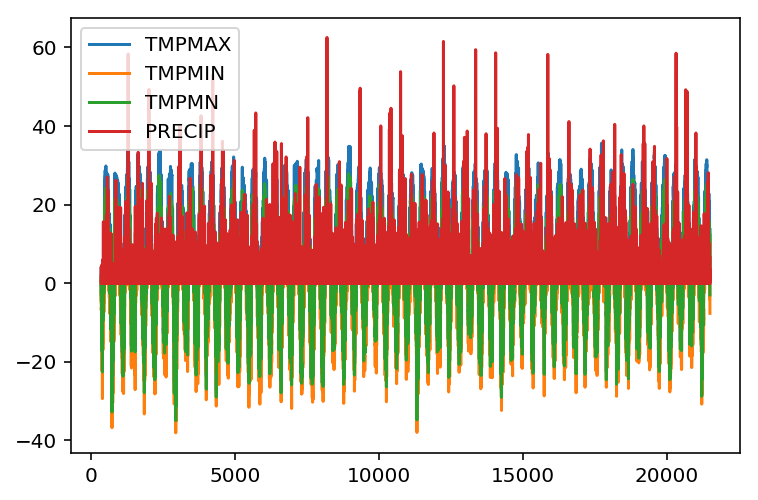

In [77]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
ex.plot();

Что-нибудь видно? Не очень. Это потому, что мы попытались вывести на одном графике четыре разных параметра, да ещё и за кучу лет. Давайте возьмём поменьше данных для визуализации.

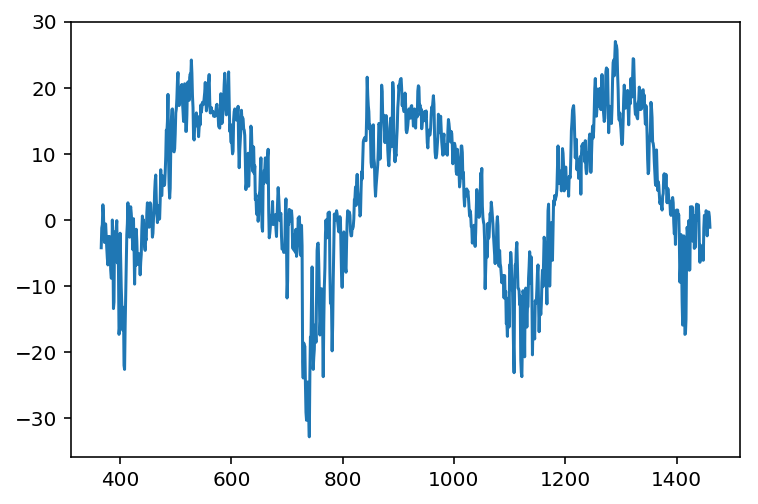

In [78]:
ex.iloc[0:365*3]['TMPMN'].plot();

Это график температуры за первые три года наблюдений.

Посмотрим, что происходит в масштабе десятилетий.

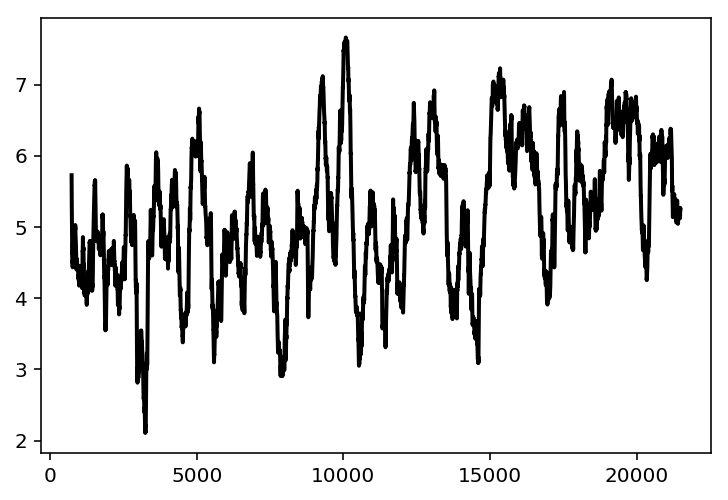

In [79]:
ex['TMPMN'].rolling(365).mean().plot(lw=2,color='black');


Здесь было сглаживание по годам.

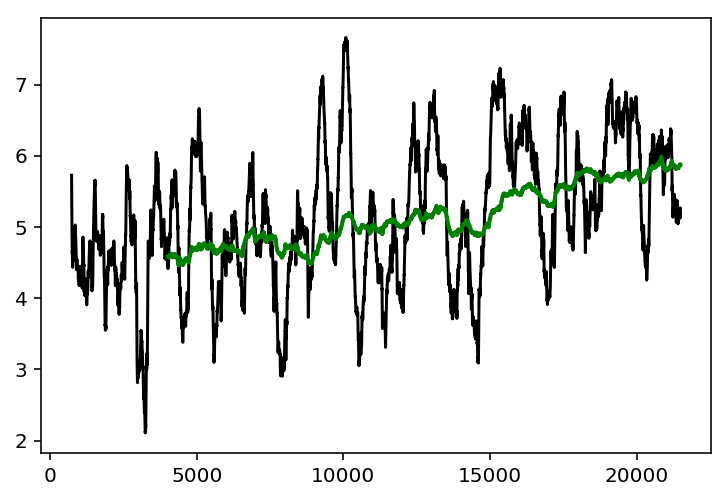

In [80]:
ex['TMPMN'].rolling(365).mean().plot(color='black')
ex['TMPMN'].rolling(3650).mean().plot(lw=2,color='green');

Сглаживание по годам и десятилетиям на одной картинке.

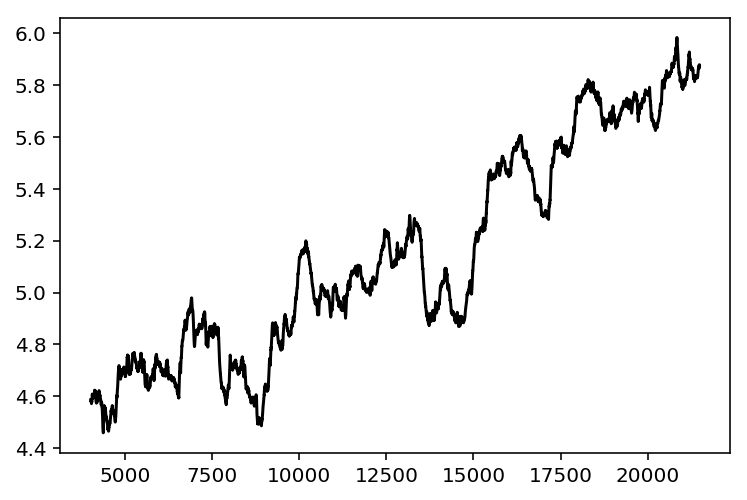

In [81]:
ex['TMPMN'].rolling(3650).mean().plot(color='black');

И, наконец, красный график отдельно. Если вас когда-нибудь интресовал вопрос о том, есть или нет глобальное потепление, то теперь, наверное, он отпал. (Вообще-то такого вопроса нет: климат меняется и действительно теплеет; вопрос, который широко обсуждается — является ли это результатом действий человека или это естественный процесс. Но на него мы так сходу не ответим.)

Часть 3. Упорядочиваем

Картинки красивые, но по горизонтальной оси написана какая-то ерунда. Это потому, что строчки сейчас индексируются числами (да ещё и отсчёт начинается с 367). Для более разумного поведения было бы хорошо индексировать строчки датами из колонки DATE_OBS. В нашем случае проблема осложняется тем, что система не воспринимает эту колонку как колонку с датами. Давайте же решим эту проблему.

In [82]:
ex['DATE_OBS'] = pd.to_datetime(ex['DATE_OBS'])
ex['DATE_OBS']

366     1949-01-01
367     1949-01-02
368     1949-01-03
369     1949-01-04
370     1949-01-05
371     1949-01-06
372     1949-01-07
373     1949-01-08
374     1949-01-09
375     1949-01-10
376     1949-01-11
377     1949-01-12
378     1949-01-13
379     1949-01-14
380     1949-01-15
381     1949-01-16
382     1949-01-17
383     1949-01-18
384     1949-01-19
385     1949-01-20
386     1949-01-21
387     1949-01-22
388     1949-01-23
389     1949-01-24
390     1949-01-25
391     1949-01-26
392     1949-01-27
393     1949-01-28
394     1949-01-29
395     1949-01-30
           ...    
21459   2006-10-02
21460   2006-10-03
21461   2006-10-04
21462   2006-10-05
21463   2006-10-06
21464   2006-10-07
21465   2006-10-08
21466   2006-10-09
21467   2006-10-10
21468   2006-10-11
21469   2006-10-12
21470   2006-10-13
21471   2006-10-14
21472   2006-10-15
21473   2006-10-16
21474   2006-10-17
21475   2006-10-18
21476   2006-10-19
21477   2006-10-20
21478   2006-10-21
21479   2006-10-22
21480   2006

Мы видим dtype: datetime64, что означает, что теперь типом данных являются даты. Сделаем теперь этот столбец индексом.

In [83]:
ex.index=ex['DATE_OBS']
ex.head()

DATE_OBS  TMPMAX  TMPMIN  TMPMN  PRECIP
DATE_OBS                                            
1949-01-01 1949-01-01    -2.1    -6.7   -4.2     0.0
1949-01-02 1949-01-02    -0.5    -6.7   -1.2     4.2
1949-01-03 1949-01-03     1.1    -2.1   -0.7     0.0
1949-01-04 1949-01-04     3.3     0.9    2.3     0.0
1949-01-05 1949-01-05     4.0    -0.9    1.1     0.8

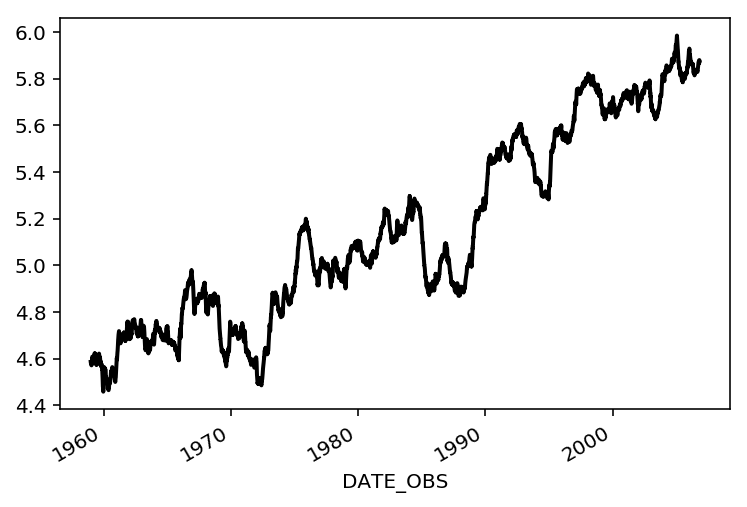

In [84]:
ex['TMPMN'].rolling(3650).mean().plot(lw=2,color='black');

Теперь вертикальная ось подписана верно. Кстати, срезы с датами тоже работают.

In [85]:
from datetime import datetime
ex[datetime(2001,1,25):datetime(2001,2,5)]

DATE_OBS  TMPMAX  TMPMIN  TMPMN  PRECIP
DATE_OBS                                            
2001-01-25 2001-01-25    -6.6   -14.8  -11.0     0.0
2001-01-26 2001-01-26    -3.5    -8.7   -5.3     0.7
2001-01-27 2001-01-27    -0.4    -4.5   -2.5     2.7
2001-01-28 2001-01-28     1.4    -0.4    0.8     3.7
2001-01-29 2001-01-29     2.9     0.8    1.4     1.1
2001-01-30 2001-01-30     1.5    -0.1    0.6     1.4
2001-01-31 2001-01-31     0.1    -1.8   -0.7     0.6
2001-02-01 2001-02-01    -1.7    -7.4   -4.5     0.0
2001-02-02 2001-02-02    -3.0   -12.3   -8.1    13.2
2001-02-03 2001-02-03    -9.3   -16.7  -13.0     2.6
2001-02-04 2001-02-04    -8.4   -16.2  -10.7    13.4
2001-02-05 2001-02-05   -11.0   -22.1  -16.0     0.9

Часть 4. Усредняем

Вернёмся к нашей задаче: верно ли, что более тёплый март — это признак того, что апрель будет более холодным? Иными словами, правда ли, что средняя температура за март и апрель отрицательно скоррелированы? Чтобы это понять, нам потребуется сформировать новую таблицу, в которой наблюдением (то есть строчкой) будет один год, а переменными (то есть столбцами) будет средняя температура за каждый месяц.

Для начала добавим в нашу таблицу столбцы, соответствующие году, месяцу и дню.

In [86]:
ex['Day']=ex.index.day
ex['Mon']=ex.index.month
ex['Year']=ex.index.year
dates=ex[['Day','Mon','Year']]
dates.head()

Day  Mon  Year
DATE_OBS                  
1949-01-01    1    1  1949
1949-01-02    2    1  1949
1949-01-03    3    1  1949
1949-01-04    4    1  1949
1949-01-05    5    1  1949

Теперь переопределим индекс более удобным для нас образом.

In [87]:
ex.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)

Предыдущей командой мы создали так называемый *мультииндекс*, то есть индекс с несколькими измерениями. Простейший пример мультииндекса из математики — индекс у матрицы $a_{i,j}$. Можно считать $i$ и $j$ двумя разными индексами, а можно считать пару $(i,j)$ одним мульииндексом. Мультииндекс — способ записать в обычную таблицу многомерную информацию. В данном случае у нас в мультииндексе три измерения — год, месяц, день. Вот так теперь выглядит наш dataframe.

In [88]:
ex.head()

DATE_OBS  TMPMAX  TMPMIN  TMPMN  PRECIP  Day  Mon  Year
Day Mon Year                                                          
1   1   1949 1949-01-01    -2.1    -6.7   -4.2     0.0    1    1  1949
2   1   1949 1949-01-02    -0.5    -6.7   -1.2     4.2    2    1  1949
3   1   1949 1949-01-03     1.1    -2.1   -0.7     0.0    3    1  1949
4   1   1949 1949-01-04     3.3     0.9    2.3     0.0    4    1  1949
5   1   1949 1949-01-05     4.0    -0.9    1.1     0.8    5    1  1949

Нам нужно для каждого года и каждого месяца найти среднюю температуру за этот месяц. Для этого следует сгруппировать элемены таблички по году и месяцу и к тому, что получилось, применить метод .mean().

In [89]:
ydm=ex.groupby(level=[0,1]).mean()
ydm.head()

TMPMAX     TMPMIN      TMPMN    PRECIP  Day  Mon    Year
Day Mon                                                             
1   1    -5.189655  -9.877586  -7.600000  1.639655  1.0  1.0  1977.5
    2    -5.932759 -13.000000  -9.427586  1.517241  1.0  2.0  1977.5
    3    -1.958621  -8.429310  -5.256897  1.937931  1.0  3.0  1977.5
    4     5.962069  -1.841379   1.787931  1.137931  1.0  4.0  1977.5
    5    16.070690   5.229310  10.543103  1.389655  1.0  5.0  1977.5

Почти то, что нужно. Теперь оставим лишь интересующий нас параметр — среднюю температуру за день (усредненную потом ещё и за месяц), то есть TMPMN.

In [90]:
tmpmn=ydm['TMPMN']
tmpmn.head()

Day  Mon
1    1      -7.600000
     2      -9.427586
     3      -5.256897
     4       1.787931
     5      10.543103
Name: TMPMN, dtype: float64

И сделаем из одномерной таблицы с мультииндексом двумерную таблицу с обычными одномерными индексами:

In [91]:
mm=tmpmn.unstack()
mm.head()

Mon        1         2         3         4          5          6          7   \
Day                                                                            
1   -7.600000 -9.427586 -5.256897  1.787931  10.543103  14.848276  17.843103   
2   -7.510345 -8.889655 -4.960345  1.765517   9.886207  14.762069  17.755172   
3   -7.462069 -9.375862 -4.863793  2.279310  10.508621  15.039655  17.801724   
4   -7.056897 -8.937931 -5.267241  2.993103  11.163793  15.248276  17.822414   
5   -7.072414 -8.400000 -4.744828  3.267241  11.600000  16.062069  17.882759   

Mon         8          9         10        11        12  
Day                                                      
1    18.786207  14.350000  7.775862  1.292982 -4.561404  
2    19.113793  13.915517  7.512069  1.514035 -4.219298  
3    18.817241  13.694828  7.201724  1.007018 -3.940351  
4    18.394828  13.963793  7.267241  0.782456 -3.843860  
5    18.031034  13.850000  7.193103  0.721053 -4.119298

Вот теперь совсем то, что нужно! Дадим месяцам осмысленные имена.

In [92]:
mm.columns=['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь']

Часть 5. Считаем.
Барабанная дробь! Торжественный момент: мы наконец можем посчитать интересующие нас корреляции! Та-дам!

In [93]:
correlation=mm.corr()
correlation

Январь   Февраль      Март    Апрель       Май      Июнь  \
Январь    1.000000 -0.131677 -0.453348 -0.443227 -0.448724 -0.550136   
Февраль  -0.131677  1.000000  0.912015  0.883544  0.840798  0.734942   
Март     -0.453348  0.912015  1.000000  0.964357  0.895626  0.872708   
Апрель   -0.443227  0.883544  0.964357  1.000000  0.937115  0.891070   
Май      -0.448724  0.840798  0.895626  0.937115  1.000000  0.840929   
Июнь     -0.550136  0.734942  0.872708  0.891070  0.840929  1.000000   
Июль     -0.225002  0.276905  0.403928  0.384489  0.299714  0.470558   
Август    0.400108 -0.826310 -0.942095 -0.923406 -0.867875 -0.907991   
Сентябрь  0.421212 -0.881906 -0.965057 -0.985180 -0.913026 -0.885168   
Октябрь   0.456942 -0.925002 -0.955875 -0.967065 -0.912604 -0.815012   
Ноябрь    0.446566 -0.885827 -0.953156 -0.970698 -0.865335 -0.875836   
Декабрь   0.397207 -0.808408 -0.843583 -0.885344 -0.791074 -0.777223   

              Июль    Август  Сентябрь   Октябрь    Ноябрь   Декабрь  
Январь   -0.225002  0.400108  0.421212  0.456942  0.446566  0.397207  
Февраль   0.276905 -0.826310 -0.881906 -0.925002 -0.885827 -0.808408  
Март      0.403928 -0.942095 -0.965057 -0.955875 -0.953156 -0.843583  
Апрель    0.384489 -0.923406 -0.985180 -0.967065 -0.970698 -0.885344  
Май       0.299714 -0.867875 -0.913026 -0.912604 -0.865335 -0.791074  
Июнь      0.470558 -0.907991 -0.885168 -0.815012 -0.875836 -0.777223  
Июль      1.000000 -0.590519 -0.426549 -0.239393 -0.356183 -0.507493  
Август   -0.590519  1.000000  0.934994  0.871192  0.910866  0.851324  
Сентябрь -0.426549  0.934994  1.000000  0.962102  0.961602  0.903707  
Октябрь  -0.239393  0.871192  0.962102  1.000000  0.954064  0.833164  
Ноябрь   -0.356183  0.910866  0.961602  0.954064  1.000000  0.860056  
Декабрь  -0.507493  0.851324  0.903707  0.833164  0.860056  1.000000

На табличку с цифрами смотреть не очень приятно, так что мы лучше нарисуем картинку.

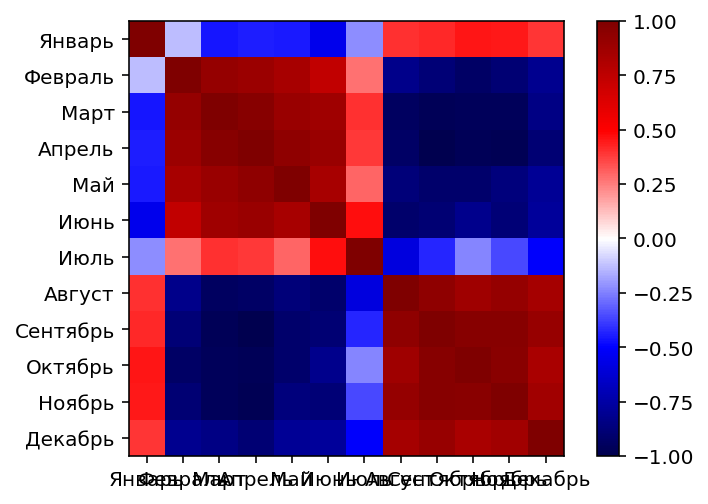

In [94]:
import matplotlib.pyplot as plt
plt.imshow(correlation,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),correlation.columns)
plt.yticks(range(len(corr)),correlation.columns);

Красные квадратики означают положительную корреляцию, синие — отрицательную. Как видим, исходное утверждение «если март тёплый, то апрель будет холодным», подтвердилось с точностью до наоборот — корреляция положительная. А вот между июнем и ноябрём — отрицательная. (Интересно, почему так? Это действительно есть такой эффект или просто артефакт наших данных?)

Проиллюстрируем утверждение о корреляциях на графиках, которые называются точечными диаграммами или диаграммами рассеяния (scatter plot).

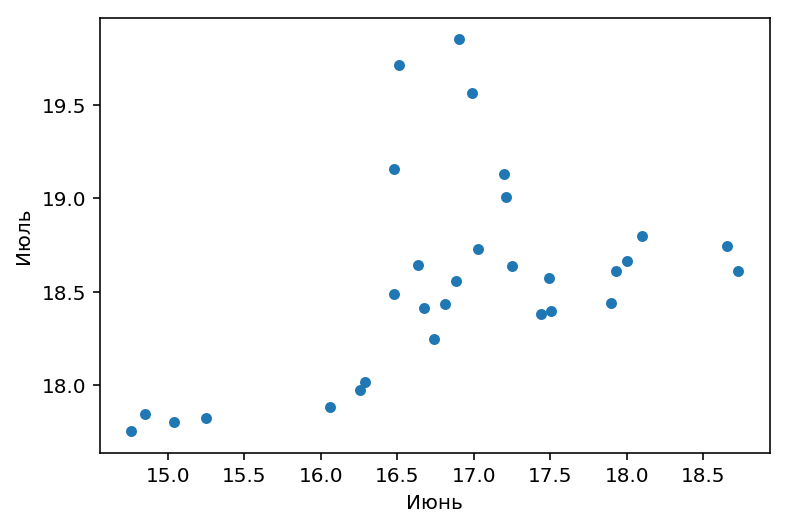

In [95]:
mm.plot(kind='scatter',x='Июнь',y='Июль');

Каждая точка на графике — это один год, по горизонтальной оси отмечена средняя температура за март, а по вертикальной — за апрель. Видно, что график немного вытянут вдоль диагонали, которая идёт «из левого нижнего угла в правый верхний» — это и соответствует наличию положительной корреляции.

А вот аналогичный график для пары июнь — ноябрь:

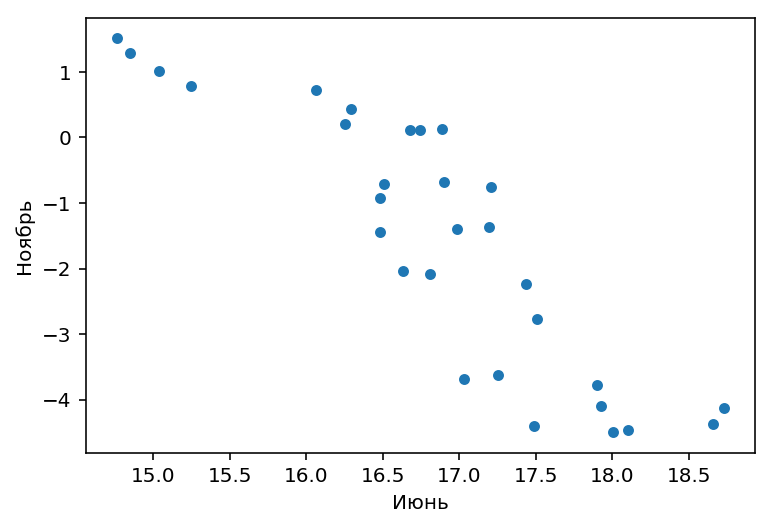

In [96]:
mm.plot(kind='scatter',x='Июнь',y='Ноябрь');

На сколько градусов растёт в среднем температура за один год? (Посчитать регрессию с помощью statsmodels.)

In [97]:
import statsmodels.api as sm
ydm_x = sm.add_constant(tmpmn)
ex_year = sm.OLS(ydm_x, tmpmn).fit()
ex_year.params

0    1
TMPMN  0.042429  1.0

Известна поговорка «после дождичка в четверг» (о маловероятном событии). Проверить с помощью теста Стьюдента, отличается ли статистически значимо уровень осадков (PRECIP), выпадающих по четвергам, от уровня осадков в остальные дни недели? (dat.index.weekday.)

In [98]:
from statsmodels.stats.weightstats import ttest_ind
ex['dayofweek'] = ex['DATE_OBS'].dt.dayofweek
day_thu = ex['dayofweek'] == 3
thu = ex.loc[day_thu]['PRECIP']
days_of_the_week = ex['dayofweek'] != 3
days = ex.loc[days_of_the_week]['PRECIP']
ttest_ind(thu, days)

(1.4719865871701623, 0.14103940066043644, 21119.0)

Часть 6. Дополните данными с 2007 по 2017 год для Москвы с файла lab4_moscow07-16. 


In [99]:
msk= pd.read_csv("lab4_moscow07-16.csv",
                 index_col=False,
                 header=6,
                 encoding = "ANSI",
                 low_memory=False,
                 sep=';')



In [100]:
msk.drop(['Po','P','Pa','U','DD','Ff','ff10','ff3','N','WW','W1','W2','Tn','Tx',
           'Cl','Nh','H','Cm','Ch','VV','Td','RRR','tR','E','Tg','E\'','sss'],inplace=True,axis=1)
msk['Местное время в Москве (ВДНХ)'] = pd.to_datetime(msk['Местное время в Москве (ВДНХ)'])
msk.index = msk['Местное время в Москве (ВДНХ)']
msk['Year']=msk.index.year
msk['Mon']=msk.index.month
msk['Day']=msk.index.day
msk['Time']=msk.index.time
date_time=msk[['Year','Mon','Day','Time']]
msk.index=pd.MultiIndex.from_tuples(date_time.values.tolist(), names=date_time.columns)
msk.head()

Местное время в Москве (ВДНХ)    T  Year  Mon  Day  \
Year Mon Day Time                                                          
2016 10  19  21:00:00           2016-10-19 21:00:00  1.9  2016   10   19   
             18:00:00           2016-10-19 18:00:00  1.9  2016   10   19   
             15:00:00           2016-10-19 15:00:00  2.5  2016   10   19   
             12:00:00           2016-10-19 12:00:00  2.2  2016   10   19   
             09:00:00           2016-10-19 09:00:00  1.9  2016   10   19   

                           Time  
Year Mon Day Time                
2016 10  19  21:00:00  21:00:00  
             18:00:00  18:00:00  
             15:00:00  15:00:00  
             12:00:00  12:00:00  
             09:00:00  09:00:00

Постройте аналогичную таблицу корреляции для этих годов. 

In [101]:
msk_df_mean_tamp=msk.groupby(level=[0,1]).mean()
t_mean=msk_df_mean_tamp['T']
t_mean_mon=t_mean.unstack()
t_mean_mon.columns=['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь']
corr_msk = t_mean_mon.corr()
corr_msk

Январь   Февраль      Март    Апрель       Май      Июнь  \
Январь    1.000000  0.079802  0.302081 -0.488502 -0.376759  0.058104   
Февраль   0.079802  1.000000  0.029614  0.061360 -0.166741 -0.198284   
Март      0.302081  0.029614  1.000000 -0.131590  0.290700 -0.129635   
Апрель   -0.488502  0.061360 -0.131590  1.000000  0.232139  0.285467   
Май      -0.376759 -0.166741  0.290700  0.232139  1.000000  0.077832   
Июнь      0.058104 -0.198284 -0.129635  0.285467  0.077832  1.000000   
Июль     -0.581073 -0.206237  0.141016  0.376922  0.026110  0.144694   
Август   -0.084008 -0.270217  0.488922  0.235837  0.281389  0.352725   
Сентябрь -0.356964 -0.201570  0.308084  0.128450  0.186659 -0.199242   
Октябрь   0.727308  0.232660  0.192743 -0.119106 -0.515191  0.418115   
Ноябрь    0.299239  0.478717 -0.089277  0.050308 -0.543250  0.485194   
Декабрь   0.199093  0.344748  0.267887  0.052531  0.229511  0.527878   

              Июль    Август  Сентябрь   Октябрь    Ноябрь   Декабрь  
Январь   -0.581073 -0.084008 -0.356964  0.727308  0.299239  0.199093  
Февраль  -0.206237 -0.270217 -0.201570  0.232660  0.478717  0.344748  
Март      0.141016  0.488922  0.308084  0.192743 -0.089277  0.267887  
Апрель    0.376922  0.235837  0.128450 -0.119106  0.050308  0.052531  
Май       0.026110  0.281389  0.186659 -0.515191 -0.543250  0.229511  
Июнь      0.144694  0.352725 -0.199242  0.418115  0.485194  0.527878  
Июль      1.000000  0.700731  0.276773 -0.157309  0.079905 -0.031050  
Август    0.700731  1.000000 -0.101403  0.254010 -0.025854  0.338810  
Сентябрь  0.276773 -0.101403  1.000000 -0.591857 -0.058218 -0.089434  
Октябрь  -0.157309  0.254010 -0.591857  1.000000  0.560412  0.384971  
Ноябрь    0.079905 -0.025854 -0.058218  0.560412  1.000000  0.451672  
Декабрь  -0.031050  0.338810 -0.089434  0.384971  0.451672  1.000000

Постройте картинку. 

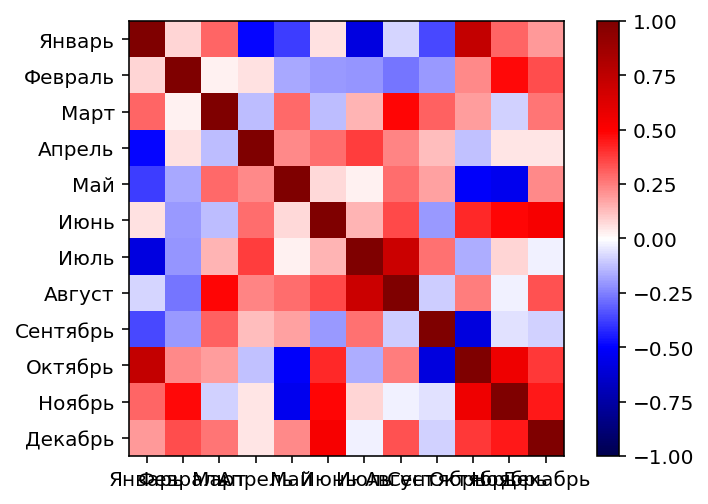

In [106]:
plt.imshow(corr_msk,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr_msk)),corr_msk.columns)
plt.yticks(range(len(corr_msk)),corr_msk.columns);

И 2 графика, аналогичным выше.

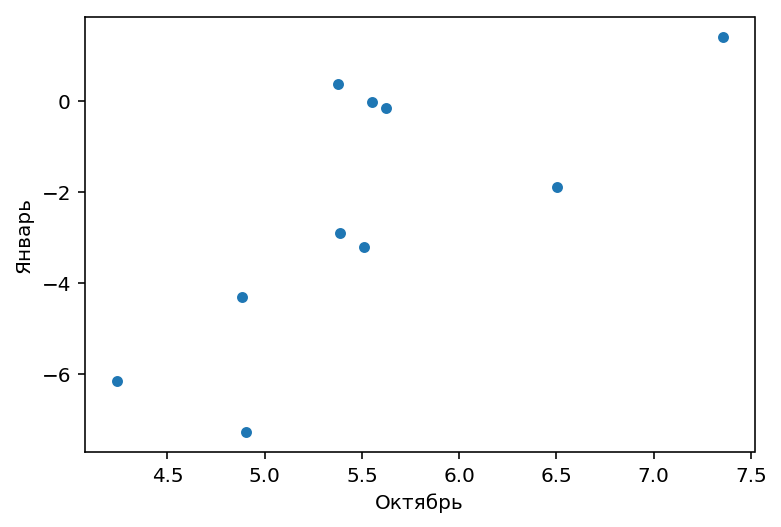

In [107]:
t_mean_mon.plot(kind='scatter',x='Октябрь',y='Январь');

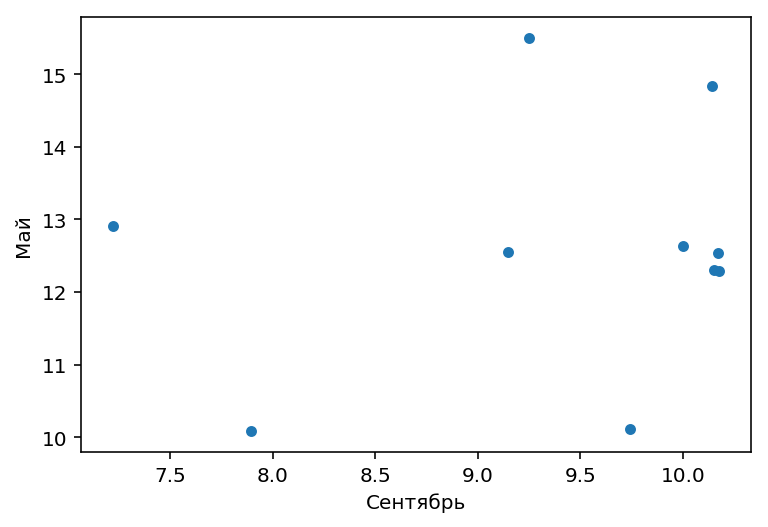

In [108]:
t_mean_mon.plot(kind='scatter',x='Сентябрь',y='Май');

Сделайте вывод. 

Вывод. 

In [105]:
#Oct-Jan - положительная корреляция, а Nov- May - отрицательная корреляция. 
#Общая статистика corr не значительна совпадает с данными прошлых 
#в мск это скорее всего связана с небольшим количеством входных данных.

Часть 7. Сделайте все тоже самое для Гродно. Используйте файл lab4_grodno07-16.

In [109]:
grod= pd.read_csv("lab4_grodno07-16.csv",
                  index_col=False,
                  header=6,
                  encoding = "ANSI",
                  low_memory=False,
                  sep=';')
grod.head()

Местное время в Гродно (аэропорт)    T     Po      P   Pa     U  \
0                  19.10.2016 21:00  6.0  753.6  767.4  0.0  69.0   
1                  19.10.2016 18:00  7.0  753.6  767.3 -0.1  67.0   
2                  19.10.2016 15:00  6.4  753.7  767.5 -0.3  66.0   
3                  19.10.2016 12:00  4.5  754.0  767.8  0.0  79.0   
4                  19.10.2016 09:00  0.8  754.0  768.1 -0.4  85.0   

                            DD   Ff  ff10  ff3 ...   \
0  Ветер, дующий с юго-востока  5.0   NaN  NaN ...    
1  Ветер, дующий с юго-востока  5.0   NaN  NaN ...    
2  Ветер, дующий с юго-востока  5.0   NaN  NaN ...    
3  Ветер, дующий с юго-востока  5.0   NaN  NaN ...    
4  Ветер, дующий с юго-востока  3.0   NaN  NaN ...    

                                                  Cm  \
0  Высококучевые просвечивающие, расположенные на...   
1  Высококучевые просвечивающие, расположенные на...   
2  Высококучевые просвечивающие, расположенные на...   
3  Высококучевые просвечивающие, расположенные на...   
4  Высококучевых, высокослоистых или слоисто-дожд...   

                                                  Ch    VV   Td  RRR  tR    E  \
0                                                NaN  10.0  0.6  NaN NaN  NaN   
1  Перистых, перисто-кучевых или перисто-слоистых...  10.0  1.3  NaN NaN  NaN   
2  Перистых, перисто-кучевых или перисто-слоистых...  10.0  0.5  NaN NaN  NaN   
3  Перистых, перисто-кучевых или перисто-слоистых...  10.0  1.2  NaN NaN  NaN   
4  Перистых, перисто-кучевых или перисто-слоистых...  10.0 -1.5  NaN NaN  NaN   

   Tg   E'  sss  
0 NaN  NaN  NaN  
1 NaN  NaN  NaN  
2 NaN  NaN  NaN  
3 NaN  NaN  NaN  
4 NaN  NaN  NaN  

[5 rows x 29 columns]

In [61]:
grod.drop(['Po','P','Pa','U','DD','Ff','ff10','ff3','N','WW','W1','W2','Tn','Tx','Cl','Nh','H','Cm','Ch','VV','Td','RRR','tR','E','Tg','E\'','sss'],inplace=True,axis=1)
grod['Местное время в Гродно (аэропорт)'] = pd.to_datetime(grod['Местное время в Гродно (аэропорт)'])
grod.index = grod['Местное время в Гродно (аэропорт)']
grod['Year']=grod.index.year
grod['Mon']=grod.index.month
grod['Day']=grod.index.day
grod['Time']=grod.index.time
date_time=grod[['Year','Mon','Day','Time']]
grod.index=pd.MultiIndex.from_tuples(date_time.values.tolist(), names=date_time.columns)
grod_df_mean_tamp=grod.groupby(level=[0,1]).mean()
t_mean=grod_df_mean_tamp['T']
t_mean_mon=t_mean.unstack()
t_mean_mon.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
corr_grod = t_mean_mon.corr()
corr_grod

Jan       Feb       Mar       Apr       May       Jun       Jul  \
Jan  1.000000  0.054684  0.199982  0.049628 -0.223514  0.346132 -0.691515   
Feb  0.054684  1.000000  0.120643 -0.325430 -0.190653  0.093051  0.004017   
Mar  0.199982  0.120643  1.000000  0.057315 -0.047771 -0.269314  0.188779   
Apr  0.049628 -0.325430  0.057315  1.000000  0.110129 -0.198906 -0.089175   
May -0.223514 -0.190653 -0.047771  0.110129  1.000000  0.595601  0.210990   
Jun  0.346132  0.093051 -0.269314 -0.198906  0.595601  1.000000 -0.394720   
Jul -0.691515  0.004017  0.188779 -0.089175  0.210990 -0.394720  1.000000   
Aug  0.504328  0.260154  0.260031 -0.432117  0.199882  0.456358 -0.066994   
Sep  0.181965 -0.163776  0.308606  0.189208  0.140111  0.099476  0.023339   
Oct  0.111736  0.637200 -0.195672  0.084047  0.279159  0.296887 -0.014023   
Nov  0.193197  0.378961 -0.272111 -0.502586 -0.074832  0.587783 -0.190032   
Dec  0.264817  0.360320 -0.056103 -0.098792  0.468207  0.746856  0.010143   

          Aug       Sep       Oct       Nov       Dec  
Jan  0.504328  0.181965  0.111736  0.193197  0.264817  
Feb  0.260154 -0.163776  0.637200  0.378961  0.360320  
Mar  0.260031  0.308606 -0.195672 -0.272111 -0.056103  
Apr -0.432117  0.189208  0.084047 -0.502586 -0.098792  
May  0.199882  0.140111  0.279159 -0.074832  0.468207  
Jun  0.456358  0.099476  0.296887  0.587783  0.746856  
Jul -0.066994  0.023339 -0.014023 -0.190032  0.010143  
Aug  1.000000  0.369636  0.211692  0.308174  0.677314  
Sep  0.369636  1.000000 -0.374149  0.221470  0.378306  
Oct  0.211692 -0.374149  1.000000 -0.018975  0.439716  
Nov  0.308174  0.221470 -0.018975  1.000000  0.591523  
Dec  0.677314  0.378306  0.439716  0.591523  1.000000

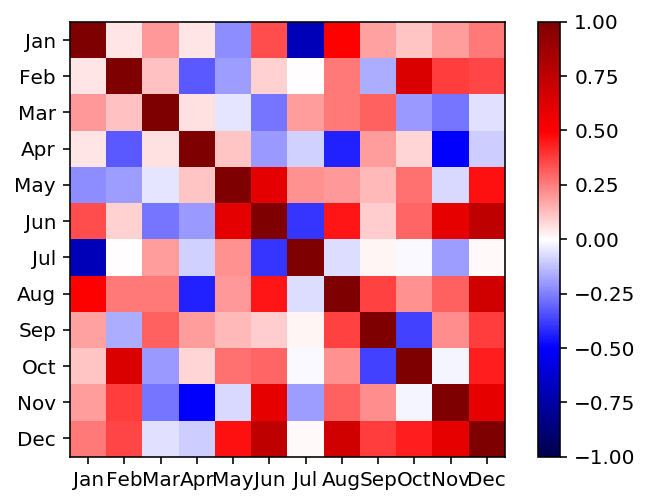

In [111]:
plt.imshow(corr_grod,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr_grod)),corr_grod.columns)
plt.yticks(range(len(corr_grod)),corr_grod.columns);

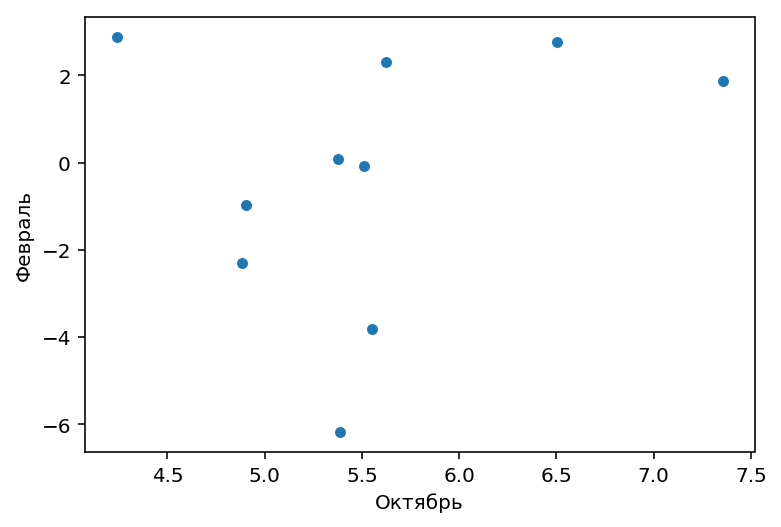

In [112]:
t_mean_mon.plot(kind='scatter',x='Октябрь',y='Февраль');

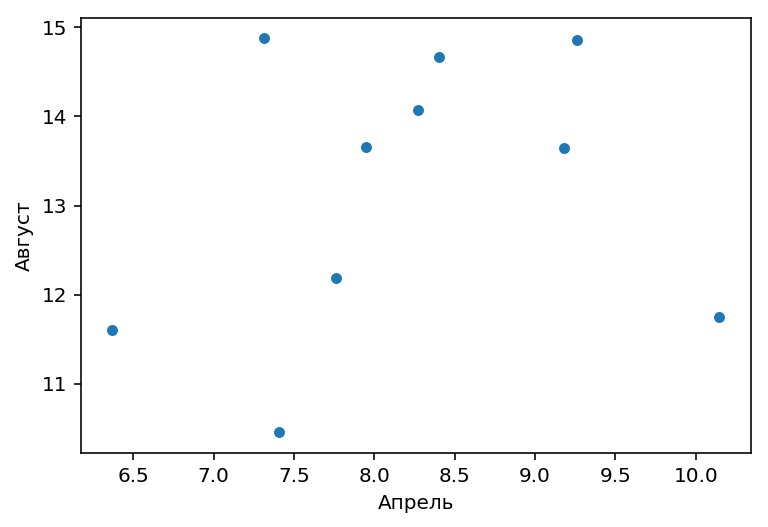

In [113]:
t_mean_mon.plot(kind='scatter',x='Апрель',y='Август');

Вывод.

In [ ]:
#Oct-Feb - положительная корреляция, а Apr- Nov - отрицательная корреляция. 
#Общая статистика corr для Гродно с 2007- 2016 не значительна совпадает с данными прошлых 
#в мск и также и с новыми по мск.